In [13]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Info about fill

In [2]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

# Tunes

In [3]:
tune_data = get_HS_tunes(fill_number, mode = 'FLATTOP')

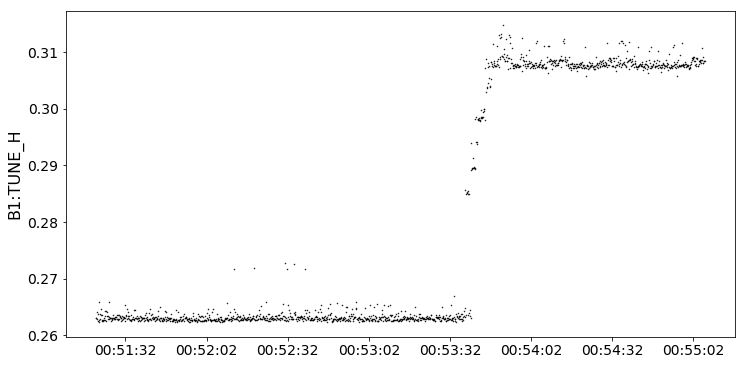

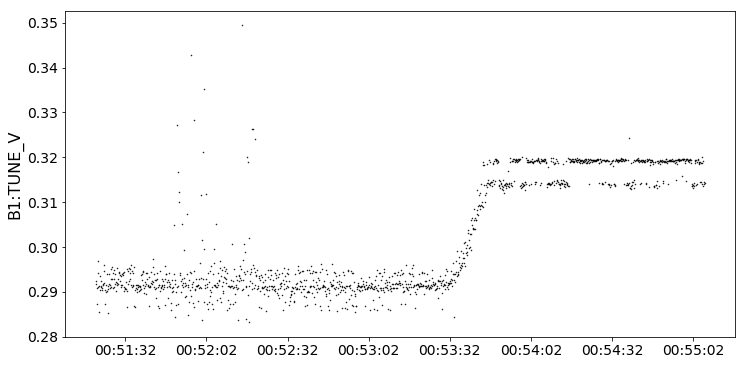

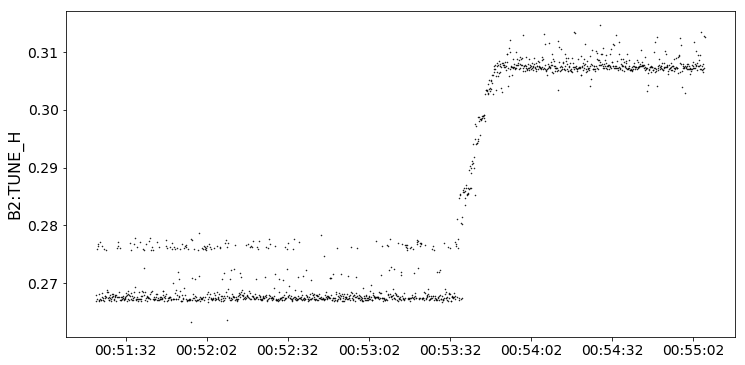

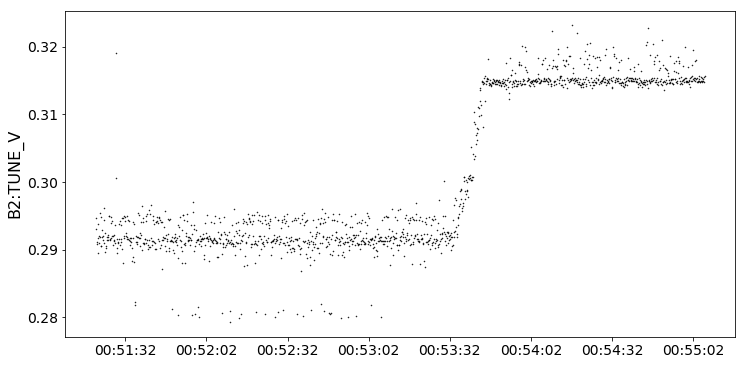

In [4]:
plot_tune_evolution(tune_data, fill_info, vertical_lines=False)

# TbT

In [30]:
modes = ['FLATTOP', 'FLATTOP', 'FLATTOP']
time = {}
time['FLATTOP'] = (fill_info['FLATTOP']['startTime'], pd.Timestamp('2018-05-22 00:53:02+00:00') )
time['FLATTOP1'] = (pd.Timestamp('2018-05-22 00:53:02+00:00'),pd.Timestamp('2018-05-22 00:54:02+00:00'))
time['FLATTOP2'] = (pd.Timestamp('2018-05-22 00:54:02+00:00'),fill_info['FLATTOP']['endTime'] )
df = get_data(modes, time, rename_duplicates=True)

Renaming key...
Renaming key...
Renaming key...
Renaming key...
Renaming key...
Renaming key...
Renaming key...
Renaming key...


# Organize 50 Hz h by FFT

In [31]:
df_fft = get_fft(df)

B1 H FLATTOP2
B1 H FLATTOP
B1 H FLATTOP1
B1 V FLATTOP2
B1 V FLATTOP
B1 V FLATTOP1
B2 H FLATTOP2
B2 H FLATTOP
B2 H FLATTOP1
B2 V FLATTOP2
B2 V FLATTOP
B2 V FLATTOP1


# Heatmaps of 50Hz lines

B1 H FLATTOP
300  strongest absolute correlations
Top Absolute Correlations
0   1      0.999714
3   4      0.998326
1   3      0.997454
0   3      0.996438
1   4      0.995078
0   4      0.993617
4   6      0.974841
3   6      0.971780
1   6      0.966073
4   5      0.964034
23  42     0.963958
0   6      0.963846
4   7      0.963164
3   5      0.961824
    7      0.958177
1   5      0.957593
0   5      0.955996
6   7      0.952924
42  80     0.949544
1   7      0.947819
23  35     0.945377
0   7      0.944262
1   2      0.941746
0   2      0.941333
35  42     0.937912
5   6      0.936055
23  80     0.936005
34  42     0.931596
2   3      0.930746
    4      0.929191
             ...   
70  109    0.652327
23  90     0.651997
78  107    0.651922
70  82     0.650312
50  54     0.649441
25  35     0.649038
82  92     0.648581
23  43     0.648223
78  97     0.647600
34  99     0.647376
30  51     0.647333
55  83     0.647294
36  42     0.647084
59  107    0.647032
52  109    0.646257
54  

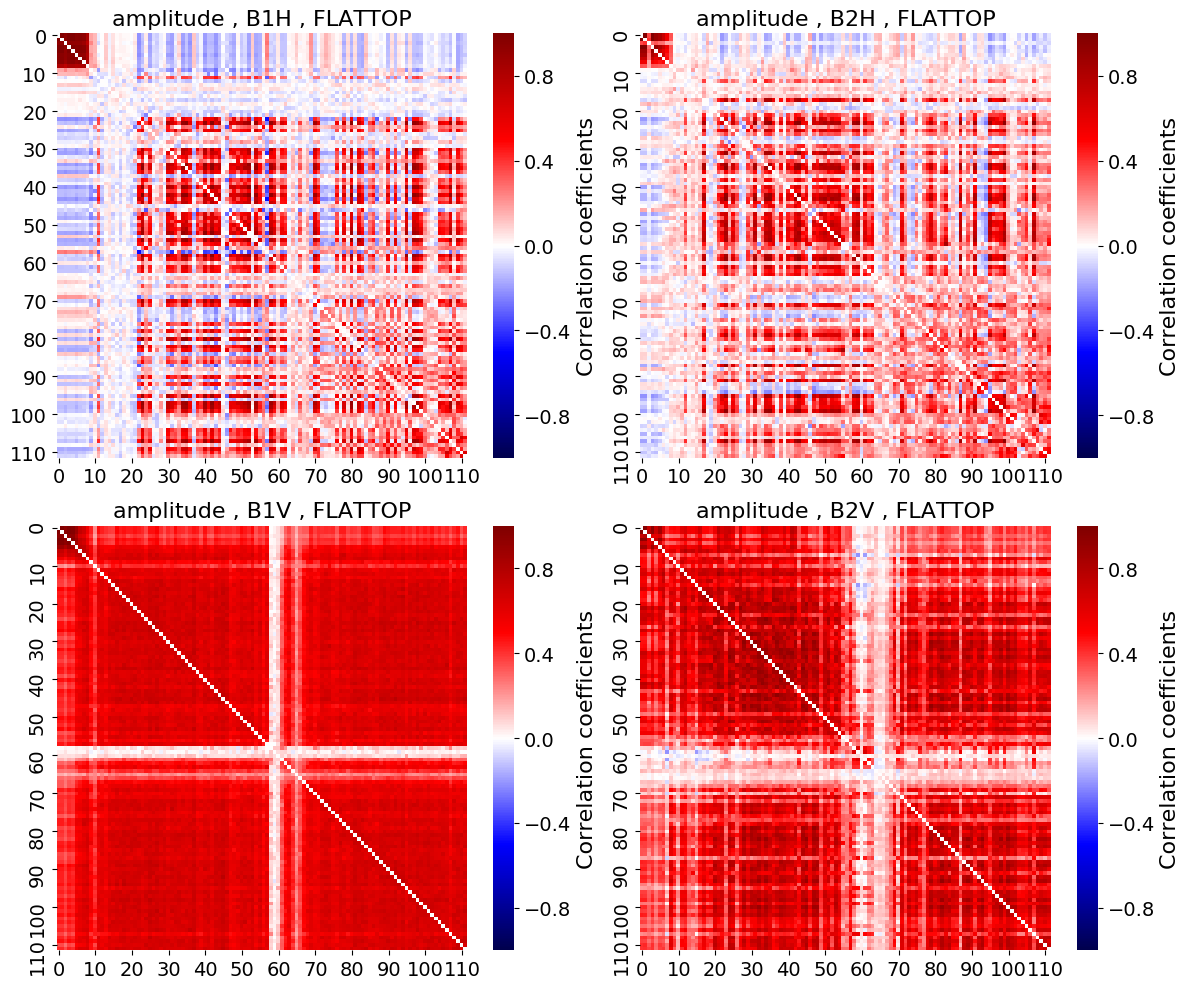

In [33]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins, pvals = heatmaps(df_fft, status=['FLATTOP'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', ax=ax)
plt.show()

# Correlation table

In [34]:
def color_max(val):
    if val >0.7:
        color='red'
    else:
        color = 'black'
    return 'color: %s' % color
style1 = corr['B1_H_FLATTOP_amplitude'].style.applymap(color_max)
style1

# Setting thresholds

B1 H FLATTOP1
Threshold set to  0.7
Top Absolute Correlations
0   1     0.999171
3   4     0.998792
1   3     0.998627
0   3     0.997811
1   4     0.996897
0   4     0.995411
4   6     0.973568
3   6     0.970026
1   6     0.965022
0   6     0.961547
4   7     0.961479
58  59    0.957964
3   7     0.955047
6   7     0.954479
47  58    0.949947
1   7     0.947601
4   5     0.944088
0   7     0.943432
1   2     0.942985
0   2     0.940236
1   5     0.939329
2   3     0.938896
3   5     0.937122
2   4     0.936576
0   5     0.935716
5   6     0.934312
40  42    0.927529
5   7     0.926031
47  49    0.919532
23  42    0.919350
            ...   
38  51    0.729557
48  54    0.727170
49  50    0.725620
48  70    0.724984
70  80    0.724791
49  54    0.723585
59  70    0.722780
52  58    0.721806
34  52    0.721583
38  61    0.721571
47  95    0.720935
31  51    0.719446
56  60    0.718583
    95    0.717093
38  57    0.716437
47  67    0.715280
50  61    0.712855
31  58    0.711936
60  61 

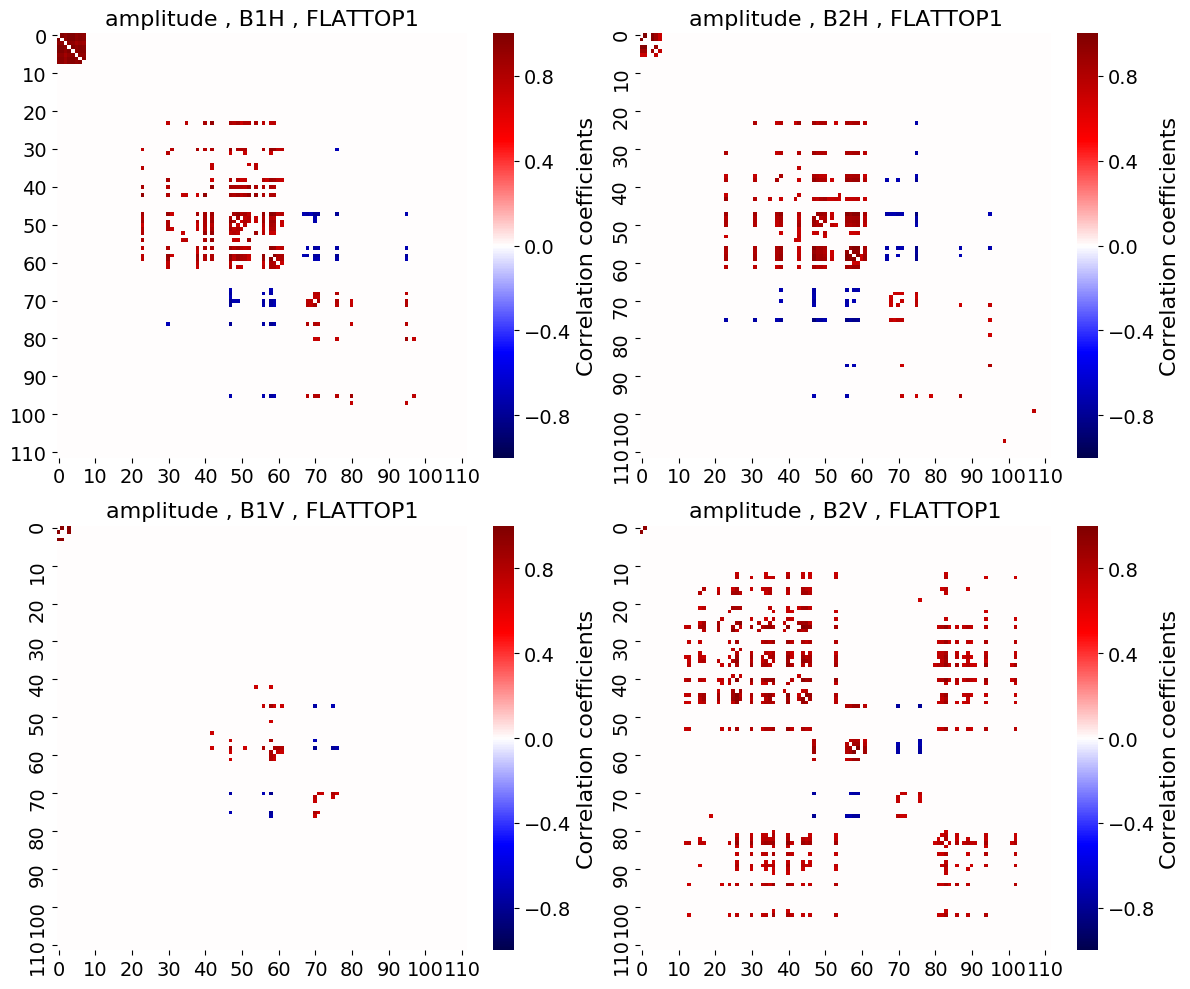

In [28]:
#corr, strongest, bins = heatmaps(df, status=['FLATTOP', 'FLATTOP1', 'FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold=0.6)
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins, pval = heatmaps(df_fft, status=['FLATTOP1'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold = 0.7,  ax=ax,pval_threshold = 0.01)
plt.show()

B1 H FLATTOP2
Threshold set to  0.7
Top Absolute Correlations
0   1      0.999571
3   4      0.997678
1   3      0.995503
0   3      0.993686
1   4      0.992466
0   4      0.990157
4   5      0.958511
    6      0.955006
3   6      0.951423
    5      0.949759
42  80     0.948891
1   6      0.946638
4   7      0.943711
42  97     0.943333
    58     0.943030
0   6      0.941351
3   7      0.940491
1   5      0.939500
0   5      0.938651
23  42     0.935224
80  97     0.931197
42  54     0.928378
1   7      0.927301
0   7      0.922501
6   7      0.922145
23  35     0.921768
    97     0.921754
35  80     0.921080
23  80     0.920230
42  107    0.915890
             ...   
23  30     0.719957
51  98     0.719184
43  54     0.719008
90  107    0.717799
71  97     0.717780
82  97     0.717233
30  34     0.716831
70  107    0.716725
34  44     0.716720
51  82     0.716575
49  58     0.716506
35  92     0.715423
    59     0.715197
    70     0.714020
49  107    0.713979
    54     0.71364

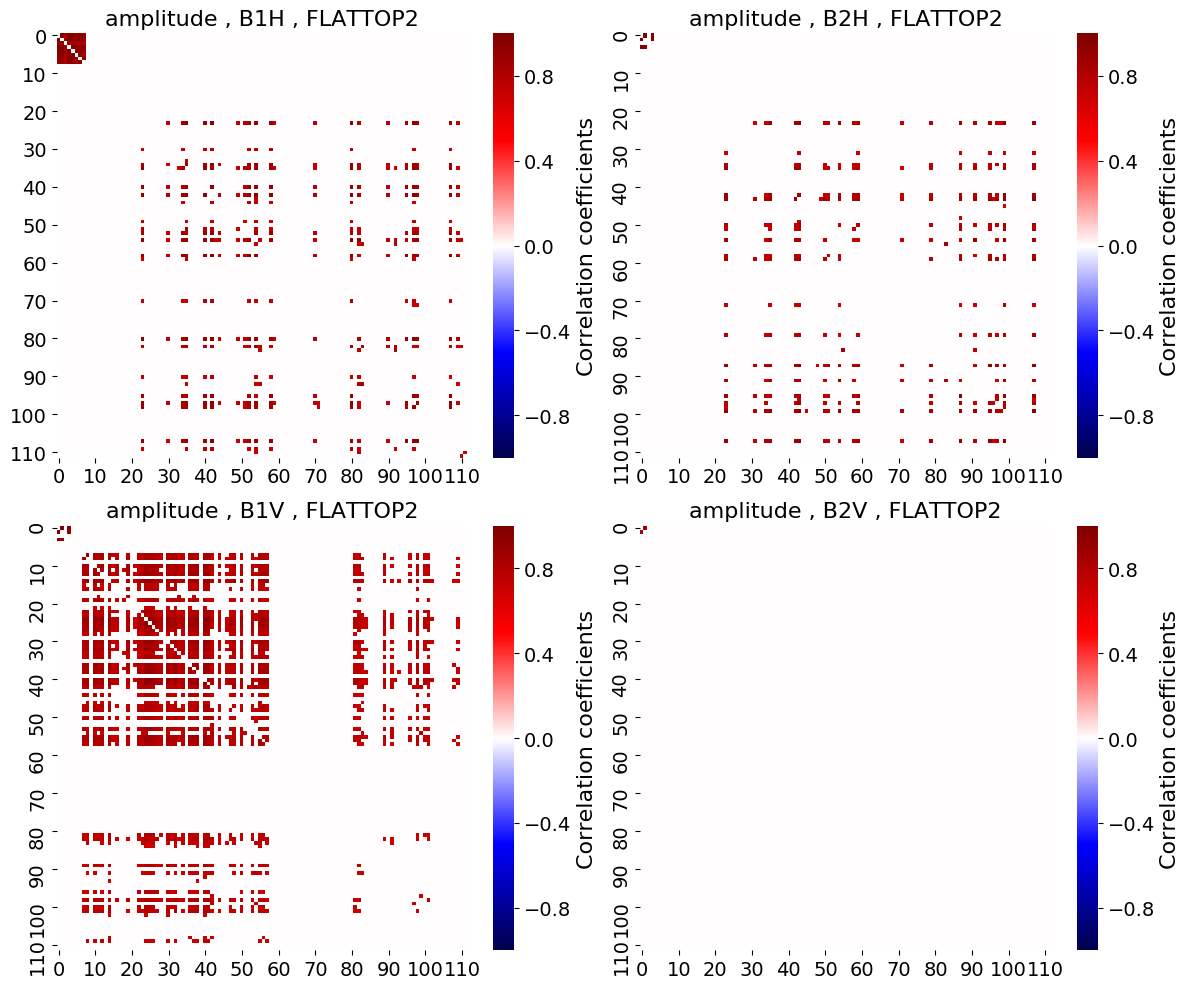

In [29]:
#corr, strongest, bins = heatmaps(df, status=['FLATTOP', 'FLATTOP1', 'FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold=0.6)
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10),sharex=True, sharey=True)
corr, strongest, bins,pvals = heatmaps(df_fft, status=['FLATTOP2'], beam=['B1', 'B2'], plane=['H', 'V'], mode='amplitude', threshold = 0.7,  ax=ax, pval_threshold = 0.01)
plt.show()

# Time evolution of amplitude of strongle correlated harmonics

B1 H FLATTOP


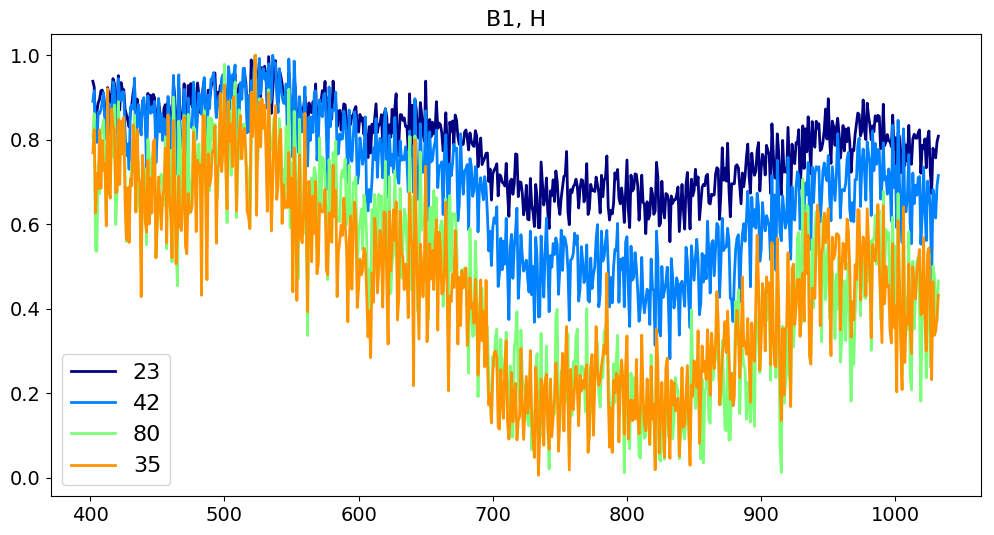

In [35]:
plt.close('all')
hs =[23, 42, 80, 35]

plot_harm(hs, df_fft, normalise=True, status=['FLATTOP'],search='h', beam=['B1'], plane=['H'])

plt.show()